In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nagan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("omicron.csv")
print(data.head())

             id             user_name   user_location  \
0  1.465690e+18                Abaris           Hants   
1  1.465690e+18                GFTs         Lalaland   
2  1.465690e+18  Herbie Finkle (Cozy)             NaN   
3  1.465690e+18     Electrical Review  United Kingdom   
4  1.465690e+18       BingX Academy 🔑             NaN   

                                    user_description      user_created  \
0  Would appear on Blogger (did originally),  but...  16-09-2009 14:30   
1  There's a field somewhere beyond all doubt and...  28-12-2019 14:29   
2                           help me find me frens ❤️  10-07-2021 09:40   
3  Electrical Review is a monthly journal aimed a...  21-05-2009 08:32   
4  BingX (Prev. Bingbon) is the world's top crypt...  31-12-2013 02:57   

   user_followers  user_friends  user_favourites  user_verified  \
0            2880          4369            26907          False   
1             165           583            21152          False   
2          

In [4]:
print(data.isnull().any())

id                  False
user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source              False
retweets            False
favorites           False
is_retweet          False
dtype: bool


In [5]:
print(data.isnull().sum())

id                      0
user_name               0
user_location       10812
user_description     2811
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            12877
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64


In [8]:
data=data.dropna()

In [9]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [10]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

As we have cleaned the text column, now let’s have a look at the word cloud of the text column to look at the most number of words used by the people on their tweets:

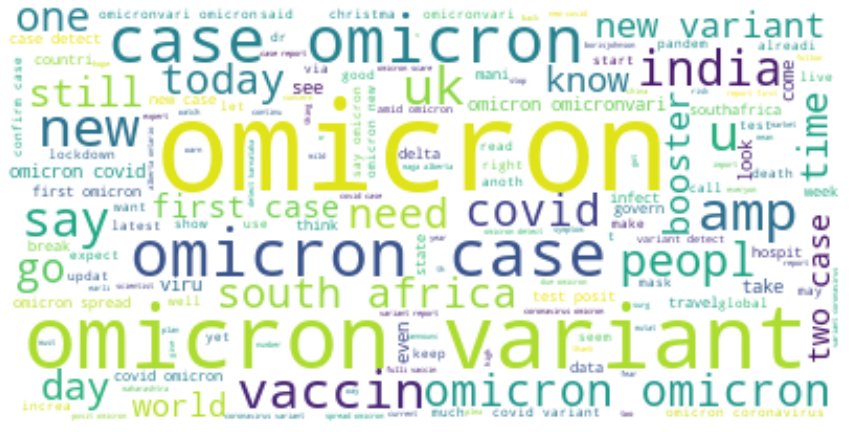

In [11]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the word cloud of the hashtags column to look at the most number of hashtags used by the people on their tweets:

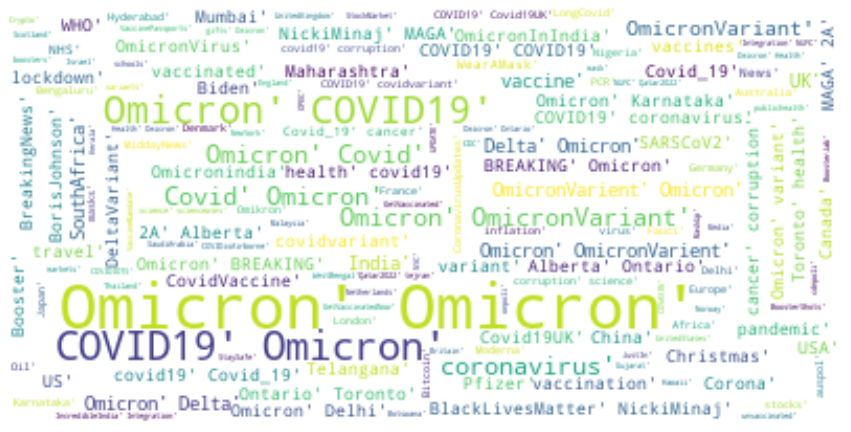

In [12]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will calculate the sentiment scores of the tweets about the Omicron variant. Here I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the text column:

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nagan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  skynew told id back omicron “odium medicum ins...      0.16     0.000   
1                         someon told octob omicron       0.00     0.000   
3  autom system becom increas complex effort test...      0.00     0.000   
5  digitaldisrupt emerg technolog stay privat inv...      0.00     0.000   
7  fatigu head bodi ach occasion sore throat coug...      0.00     0.172   

   Neutral  
0    0.840  
1    1.000  
3    1.000  
5    1.000  
7    0.828  


Now let’s see how most of the people reacted about the Omicron variant:

In [14]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the opinions were Neutral, which means that people were sharing information about the Omicron variant instead of sharing any positive or negative opinions